# Tugas Besar IF2220 Probabilitas dan Statistika 23/24

Author: Aland Mulia Pratama (13522124), Christian Justin Hendrawan (13522135) (Kelompok 12 K03)

## Analisis Statistika
### Soal General [Untuk setiap jenis dataset] 

1) Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

2) Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

3) Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 

4) Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

### Dataset Candy
Andi baru saja mendapatkan pekerjaan di sebuah perusahaan permen. Di hari pertama kerja, Ia diminta untuk mengamati permen-permen yang dihasilkan pada pabrik. Selain itu, ia juga diberikan dataset yang berisi informasi mengenai permen-permen yang baru diproduksi. Lalu, ia diminta untuk melakukan analisis statistika terhadap permen-permen tersebut serta melakukan berbagai pengujian terhadap berbagai hipotesis. Bantulah Andi dalam melakukan hal-hal tersebut!

Atribut: Calories, Serving, Protein, Sugar, Sodium, Fat, Fiber, Flavour, Popularity

Gunakan alpha = 0.05

5) Hipotesis 1 sampel
    - Perusahaan menerima beberapa keluhan bahwa permennya kurang manis. Periksalah anda mengecek apakah rata-rata nilai Sugar di bawah 25?
    - Pada umumnya, rata-rata Serving untuk permen adalah 40 gram. Oleh karena itu, periksalah apakah rata-rata Serving permen yang diproduksi tidak bernilai 40 gram!
    - Periksalah apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74!
    - Periksalah apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset!

6) Hipotesis 2 sampel
    Perusahaan ingin membandingkan kualitas permen yang diproduksi pada paruh awal dan paruh akhir produksi. Hal ini dapat dilakukan dengan membagi 1 dataset menjadi 2 bagian yang sama panjang.
    - Periksalah apakah rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu!
    - Bandingkan rata-rata Protein dari permen pada paruh awal dan akhir. Apakah rata-rata Protein pada dataset bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit?
    - Periksalah apakah variansi dari Sodium dari permen sama pada paruh awal dan akhir!
    - Periksalah apakah proporsi Calories dari permen yang lebih dari 200 pada paruh awal lebih besar daripada proporsi di paruh akhir!



In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display

data = pd.read_csv('candy.csv')
data = data.drop(columns=['Unnamed: 0'])
data.describe()

,Calories,Serving,Protein,Sugar,Sodium,Fat,Fiber,Popularity
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,199.996046,39.989139,2.974415,20.004080,74.982853,6.748226,0.490851,49.967119
std,1.127015,1.073182,1.012686,0.888751,1.007484,0.658202,0.292242,10.145767
min,195.897565,36.424752,-0.571292,16.925305,71.405873,5.162155,0.000487,-3.000000
25%,199.212548,39.272877,2.245751,19.409965,74.276512,6.279173,0.238509,42.948183
50%,200.001306,39.977855,2.979177,20.004798,75.000056,6.667726,0.489901,49.955385
75%,200.777167,40.734991,3.655002,20.588626,75.677900,7.170426,0.736093,57.153024
max,204.713237,43.561506,6.392027,22.922444,78.232301,9.498653,3.000000,86.469784


# Nomor 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

In [67]:
stats = pd.DataFrame()

unique_values = data['Flavour'].unique()

proportions = data['Flavour'].value_counts(normalize=True)

print("Unique values in kolom 'Flavour':", unique_values)
print("Proportions of unique values in 'Flavour' column:\n",proportions)

def get_mode(x):
    modes = x.mode()
    if len(modes) > 1:
        return 'multivalued'
    else:
        return modes[0]

display(Markdown(("#### Mean, Median, Standar Deviasi, Variansi, Range, Minimum, Maximum, Kuartil, IQR, Skewness, dan Kurtosis")))

stats['Mean'] = data.mean(numeric_only=True)
stats['Median'] = data.median(numeric_only=True)
stats['Mode'] = data.apply(get_mode)
stats['Std Dev'] = data.std(numeric_only=True)
stats['Variance'] = data.var(numeric_only=True)
stats['Min'] = data.min()
stats['Max'] = data.max()
stats['Range'] = stats['Max'] - stats['Min']
stats['Q1'] = data.quantile(0.25, numeric_only=True)
stats['Q2'] = data.quantile(0.5, numeric_only=True)
stats['Q3'] = data.quantile(0.75, numeric_only=True)
stats['IQR'] = stats ["Q3"] - stats ["Q1"]
stats['Skewness'] = data.skew(numeric_only=True)
stats['Kurtosis'] = data.kurtosis(numeric_only=True)

stats


Unique values in kolom 'Flavour': ['Vanilla' 'Strawberry' 'Chocolate' 'undefined']
Proportions of unique values in 'Flavour' column:
 Chocolate     0.339
Vanilla       0.332
Strawberry    0.328
undefined     0.001
Name: Flavour, dtype: float64


#### Mean, Median, Standar Deviasi, Variansi, Range, Minimum, Maximum, Kuartil, IQR, Skewness, dan Kurtosis

,Mean,Median,Mode,Std Dev,Variance,Min,Max,Range,Q1,Q2,Q3,IQR,Skewness,Kurtosis
Calories,199.996046,200.001306,multivalued,1.127015,1.270162,195.897565,204.713237,8.815673,199.212548,200.001306,200.777167,1.564619,0.041929,0.198919
Serving,39.989139,39.977855,multivalued,1.073182,1.151719,36.424752,43.561506,7.136754,39.272877,39.977855,40.734991,1.462113,0.031222,-0.119331
Protein,2.974415,2.979177,multivalued,1.012686,1.025532,-0.571292,6.392027,6.963319,2.245751,2.979177,3.655002,1.409251,0.089544,-0.099028
Sugar,20.004080,20.004798,multivalued,0.888751,0.789878,16.925305,22.922444,5.997139,19.409965,20.004798,20.588626,1.178660,0.006416,-0.048001
Sodium,74.982853,75.000056,multivalued,1.007484,1.015025,71.405873,78.232301,6.826428,74.276512,75.000056,75.677900,1.401387,-0.030713,-0.025462
Fat,6.748226,6.667726,multivalued,0.658202,0.433230,5.162155,9.498653,4.336498,6.279173,6.667726,7.170426,0.891253,0.537265,0.235368
Fiber,0.490851,0.489901,multivalued,0.292242,0.085406,0.000487,3.0,2.999513,0.238509,0.489901,0.736093,0.497585,0.324107,1.396380
Popularity,49.967119,49.955385,multivalued,10.145767,102.936586,-3.0,86.469784,89.469784,42.948183,49.955385,57.153024,14.204841,-0.148562,0.807764


# Nomor 2
Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

## Jawaban
Outliers adalah nilai-nilai dalam data yang secara signifikan berbeda dari sebagian besar nilai lainnya dalam kumpulan data. Pada kasus ini, kami mengidentifikasi outliers dengan cara menghitung Inter Quartile range (IQR) dengan mencari selisih antara quartil pertama (Q1) dan quartil ketiga (q3). Outliers diidentifikasi sebagai nilai yang lebih rendah dari Q1 dikurangi 1.5 kali IQR atau lebih besar dari Q3 ditambah 1.5 kali IQR. Dalam dataset candy, terdapat beberapa outliers pada hasil program berdasarkan kolom numerik. Outliers dapat ditangani dengan transformasi data seperti Box-Cox. Namun, pada umumnya penanganan outlier tergantung pada tujuan analisis, karakteristik data, dan konteks spesifik masalah. Dalam penanganan outliers, tidak ada kunci yang dapat membuka seluruh pintu.

In [64]:
# Fungsi untuk mendeteksi outliers
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

# Select kolom numerik
numeric_cols = data.select_dtypes(include=np.number)

# deteksi outliers pada setiap kolom numerik
outliers = numeric_cols.apply(detect_outliers_iqr)
# Filter DataFrame untuk menampilkan hanya baris dengan nilai True
outliers_true = outliers[outliers.any(axis=1)]
outliers_count = outliers_true.sum()

# Display outliers
print("Jumlah outliers pada setiap kolom numerik:")
print(outliers_count)

Jumlah outliers pada setiap kolom numerik:
Fiber          1
Protein       12
Fat           20
Sugar         13
Serving       11
Popularity    12
Sodium        13
Calories      15
dtype: int64


# Nomor 3 

Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram.


# Jawaban
Visualisasi data dilakukan per kolom atau atribut, yang dibagi menjadi histogram dan boxplot.

Urutan atributnya adalah sebagai berikut :
* Fiber
* Protein
* Fat
* Sugar
* Serving
* Popularity
* Sodium
* Calories


In [63]:
# sort column order by mean values ascending
data = data.reindex(data.mean(numeric_only=True).sort_values().index, axis=1)

# Function to plot histogram and boxplot for a given attribute
def plot_attribute(data ,attr):
  fig, axes = plt.subplots(1, 2)
  data[attr].plot(kind='hist',edgecolor='black', ax=axes[0], figsize=(10,6), title="Histogram "+attr, bins=15)
  data.boxplot(attr, ax=axes[1]).set_title("Boxplot " + attr)

# Function to plot histogram and boxplot for a given discrete attribute
def plot_discrete_attribute(data ,attr):
  fig, axes = plt.subplots(1, 2)
  data[attr].plot(kind='hist',edgecolor='black', ax=axes[0], figsize=(10,6), title="Histogram "+attr)
  data.boxplot(attr, ax=axes[1]).set_title("Boxplot " + attr)


def plot_categorical_attribute(data, attr):
    data[attr].value_counts().plot(kind='bar', title="Bar chart of " + attr)

# Fiber
Kolom Fiber yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Fiber memiliki range 2.9995 dengan jarak antarkuartil 0.497 dan frekuensi terbesar terdapat pada range sekitar 0 sampai 0.2.

Median yang ditampilkan pada box plot adalah 0.490. Pada histogram, nilai median ini berada sedikit di kanan dari puncak distribusi. Hal ini mengindikasikan bahwa distribusi data "Fiber" sedikit condong ke kanan (positively skewed).

Kurtosis sebesar 1.396 menunjukkan bahwa distribusi data "Fiber" memiliki ekor yang lebih tebal dan puncak yang lebih runcing dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup runcing dan adanya beberapa nilai ekstrem (outlier) pada ekor kanan distribusi.

Sekilas, tampak bahwa histogram Fiber memiliki positive skewness, hal ini didukung nilai outliers yakni 3 yang jauh lebih besar dari mean (0.491). Karena skewness adalah ukuran asimetri dalam distribusi data, nilai yang jauh lebih besar dari mean dapat menarik distribusi ke kanan, sehingga menciptakan skewness positif. 

Atribut Fiber hanya memiliki sedikit pencilan (Pencilan adalah data yang berada diluar kuartil pertama dan ketiga).

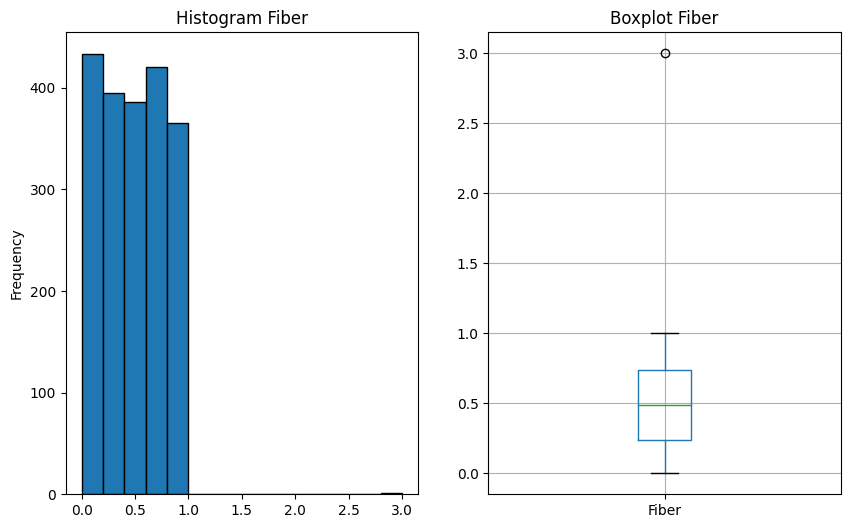

In [62]:
plot_attribute(data, 'Fiber')

# Protein

Kolom Protein yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Protein memiliki range 6.963 dengan jarak antarkuartil 1.409 dan frekuensi terbesar terdapat pada range sekitar 2.678 sampai 3.142.

Median yang ditampilkan pada box plot adalah 2.974. Pada histogram, nilai median ini berada sedikit di kanan dari puncak distribusi. Hal ini mengindikasikan bahwa distribusi data "Protein" sedikit condong ke kanan (positively skewed), sesuai dengan nilai skewness 0.089544 (positif).

Kurtosis sebesar -0.099 menunjukkan bahwa distribusi data "Protein" memiliki ekor yang lebih tipis dan puncak yang lebih datar dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup melebar dan tidak terlalu runcing.

Meskipun ada 12 outlier pada kolom Protein dengan mean (2.97), nilai skewness yang kecil (0.089544) mengindikasikan bahwa outlier-outlier tersebut tidak terlalu kuat untuk menarik distribusi ke kanan dan menciptakan skewness positif yang signifikan.

Atribut Protein memiliki cukup banyak pencilan (data yang berada di luar kuartil pertama dan ketiga), seperti yang ditunjukkan pada box plot.

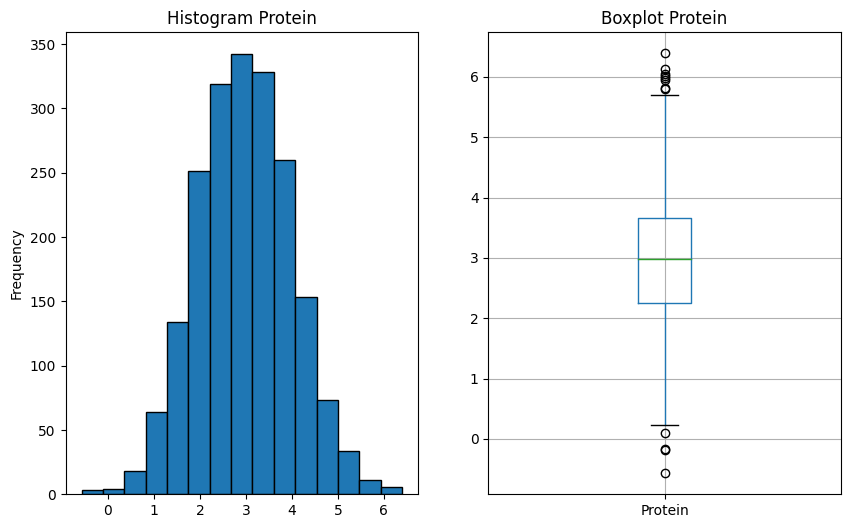

In [61]:
plot_attribute(data, 'Protein')

# Fat

Kolom Fat yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Fat memiliki range 4.336 dengan jarak antarkuartil 0.891 dan frekuensi terbesar terdapat pada range sekitar 6.318 sampai 6.607.

Median yang ditampilkan pada box plot adalah 6.667. Pada histogram, nilai median ini berada sedikit di kanan dari puncak distribusi. Hal ini mengindikasikan bahwa distribusi data "Fat" sedikit condong ke kanan (positively skewed), sesuai dengan nilai skewness 0.537 (positif).

Kurtosis sebesar 0.235 menunjukkan bahwa distribusi data "Fat" memiliki ekor yang lebih tebal dan puncak yang lebih runcing dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup runcing dan adanya beberapa nilai ekstrem (outlier) pada ekor kanan distribusi.

Meskipun ada 20 outlier pada kolom Fat dengan mean 6.748, nilai skewness yang kecil (0.537) mengindikasikan bahwa outlier-outlier tersebut tidak terlalu kuat untuk menarik distribusi ke kanan dan menciptakan skewness positif yang signifikan.

Atribut Fat memiliki cukup banyak pencilan (data yang berada di luar kuartil pertama dan ketiga), seperti yang ditunjukkan pada box plot.

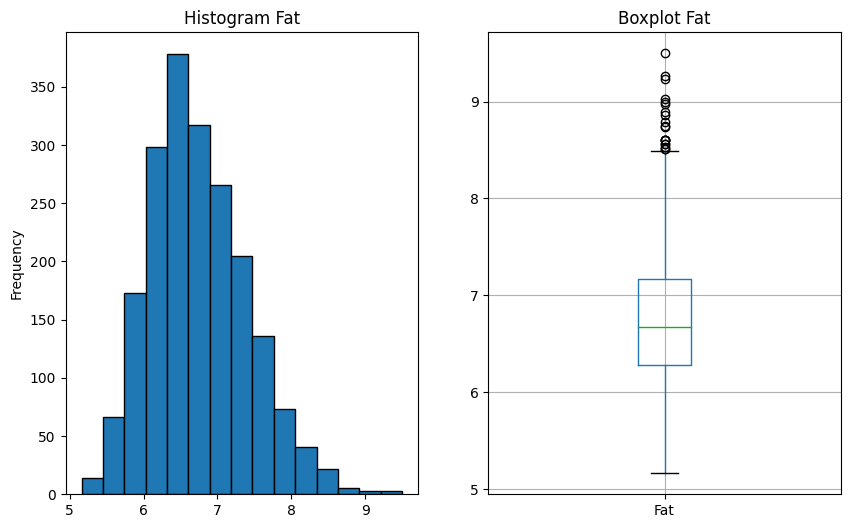

In [60]:
plot_attribute(data, 'Fat')

# Sugar

Kolom Sugar yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Fat memiliki range 5.997 dengan jarak antarkuartil 1.178 dan frekuensi terbesar terdapat pada range sekitar 19.724 sampai 20.123.

Median yang ditampilkan pada box plot adalah 20.004. Pada histogram, nilai median ini berada sedikit di kanan dari puncak distribusi. Hal ini mengindikasikan bahwa distribusi data "Sugar" sedikit condong ke kanan (positively skewed), sesuai dengan nilai skewness 0.0064 (positif).

Kurtosis sebesar -0.048 menunjukkan bahwa distribusi data "Sugar" memiliki ekor yang lebih tipis dan puncak yang lebih datar dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup melebar dan tidak terlalu runcing.

Meskipun ada 13 outlier pada kolom Sugar dengan mean 20.004, nilai skewness yang kecil (0.0064) mengindikasikan bahwa outlier-outlier tersebut tidak terlalu kuat untuk menarik distribusi ke kanan dan menciptakan skewness positif yang signifikan.

Atribut Sugar memiliki cukup banyak pencilan (data yang berada di luar kuartil pertama dan ketiga), seperti yang ditunjukkan pada box plot.

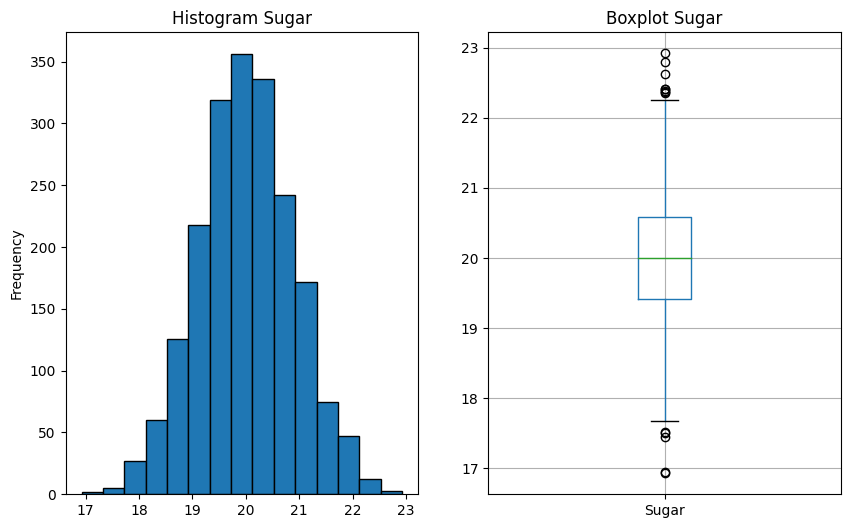

In [59]:
plot_attribute(data, 'Sugar')

# Serving

Kolom Serving yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Serving memiliki range 7.136 dengan jarak antarkuartil 1.462 dan frekuensi terbesar terdapat pada range sekitar 39.755 sampai 40.231.

Median yang ditampilkan pada box plot adalah 39.989. Pada histogram, nilai median ini berada sedikit di kanan dari puncak distribusi. Hal ini mengindikasikan bahwa distribusi data "Serving" sedikit condong ke kanan (positively skewed), sesuai dengan nilai skewness 0.0312 (positif).

Kurtosis sebesar -0.119 menunjukkan bahwa distribusi data "Serving" memiliki ekor yang lebih tipis dan puncak yang lebih datar dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup melebar dan tidak terlalu runcing.

Meskipun ada 11 outlier pada kolom Serving dengan mean 39.989, nilai skewness yang kecil (0.0312) mengindikasikan bahwa outlier-outlier tersebut tidak terlalu kuat untuk menarik distribusi ke kanan dan menciptakan skewness positif yang signifikan.

Atribut Serving memiliki cukup banyak pencilan (data yang berada di luar kuartil pertama dan ketiga), seperti yang ditunjukkan pada box plot.

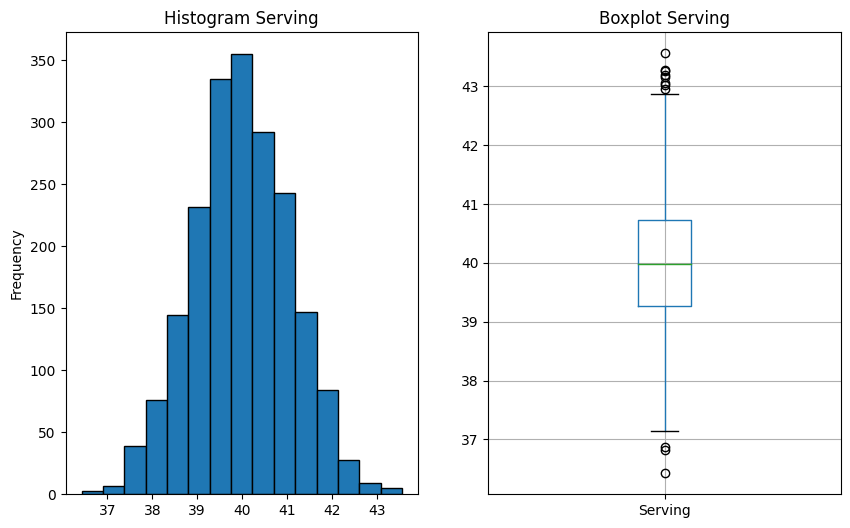

In [58]:
plot_attribute(data, 'Serving')

# Popularity

Kolom Popularity yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Popularity memiliki range 89.469 dengan jarak antarkuartil 14.204 dan frekuensi terbesar terdapat pada range sekitar 44.717 sampai 50.681.

Median yang ditampilkan pada box plot adalah 49.967. Pada histogram, nilai median ini berada sedikit di kiri dari puncak distribusi. Hal ini mengindikasikan bahwa distribusi data "Popularity" sedikit condong ke kiri (negatively skewed), sesuai dengan nilai skewness -0.148 (negatif).

Kurtosis sebesar 0.807 menunjukkan bahwa distribusi data "Popularity" memiliki ekor yang lebih tebal dan puncak yang lebih runcing dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup runcing dan adanya beberapa nilai ekstrem (outlier) pada ekor kanan distribusi.

Meskipun ada 12 outlier pada kolom Popularity dengan mean 49.967, nilai skewness (-0.148) mengindikasikan bahwa outlier-outlier tersebut tidak cukup kuat untuk menarik distribusi ke kiri dan menciptakan skewness negatif yang signifikan.

Atribut Popularity memiliki cukup banyak pencilan (data yang berada di luar kuartil pertama dan ketiga), seperti yang ditunjukkan pada box plot.

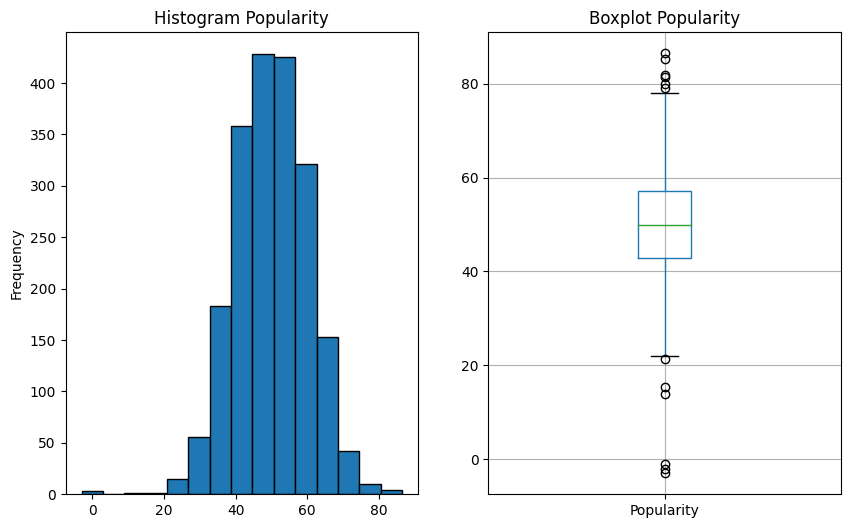

In [57]:
plot_attribute(data, 'Popularity')

# Sodium

Kolom Sodium yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Sodium memiliki range 6.826 dengan jarak antarkuartil 1.401 dan frekuensi terbesar terdapat pada range sekitar 75.0466 sampai 75.501.

Median yang ditampilkan pada box plot adalah 74.982. Pada histogram, nilai median ini berada sedikit di kiri dari puncak distribusi. Hal ini mengindikasikan bahwa distribusi data "Sodium" sedikit condong ke kiri (negatively skewed), sesuai dengan nilai skewness -0.030 (negatif).

Kurtosis sebesar -0.025 menunjukkan bahwa distribusi data "Sodium" memiliki ekor yang lebih tipis dan puncak yang lebih datar dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup melebar dan tidak terlalu runcing.

Meskipun ada 13 outlier pada kolom Sodium dengan mean 74.982, nilai skewness (-0.030 ) mengindikasikan bahwa outlier-outlier tersebut tidak cukup kuat untuk menarik distribusi ke kiri dan menciptakan skewness negatif yang signifikan.

Atribut Sodium memiliki cukup banyak pencilan (data yang berada di luar kuartil pertama dan ketiga), seperti yang ditunjukkan pada box plot.


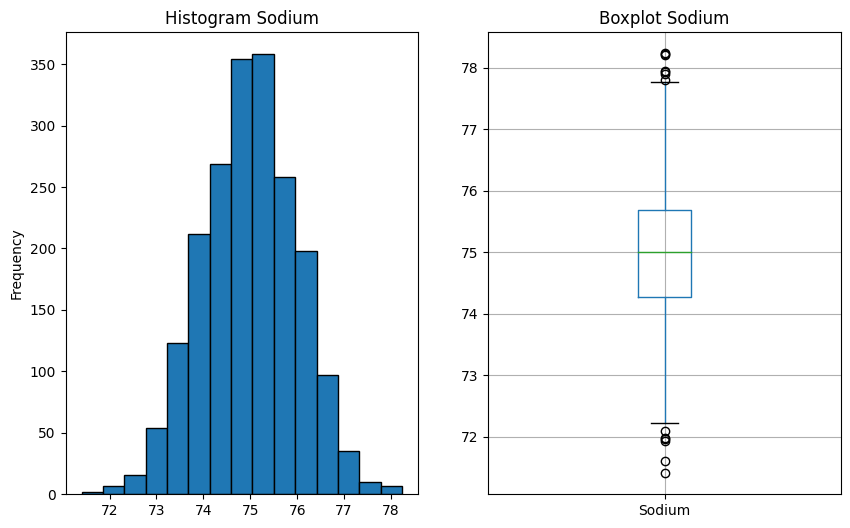

In [56]:
plot_attribute(data, 'Sodium')

# Calories

Kolom Calories yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Calories memiliki range 8.815 dengan jarak antarkuartil 1.564 dan frekuensi terbesar terdapat pada range sekitar 200.0115 sampai 200.599.

Median yang ditampilkan pada box plot adalah 200.0013. Pada histogram, nilai median ini berada sedikit di kanan dari puncak distribusi. Hal ini mengindikasikan bahwa distribusi data "Calories" sedikit condong ke kanan (positively skewed), sesuai dengan nilai skewness 0.042 (positif).

Kurtosis sebesar 0.198 menunjukkan bahwa distribusi data "Calories" memiliki ekor yang lebih tebal dan puncak yang lebih runcing dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup runcing dan adanya beberapa nilai ekstrem (outlier) pada ekor kanan distribusi.

Meskipun ada 15 outlier pada kolom Calories dengan mean 199.996, nilai skewness yang kecil (0.042) mengindikasikan bahwa outlier-outlier tersebut tidak terlalu kuat untuk menarik distribusi ke kanan dan menciptakan skewness positif yang signifikan.

Atribut Calories memiliki cukup banyak pencilan (data yang berada di luar kuartil pertama dan ketiga), seperti yang ditunjukkan pada box plot.

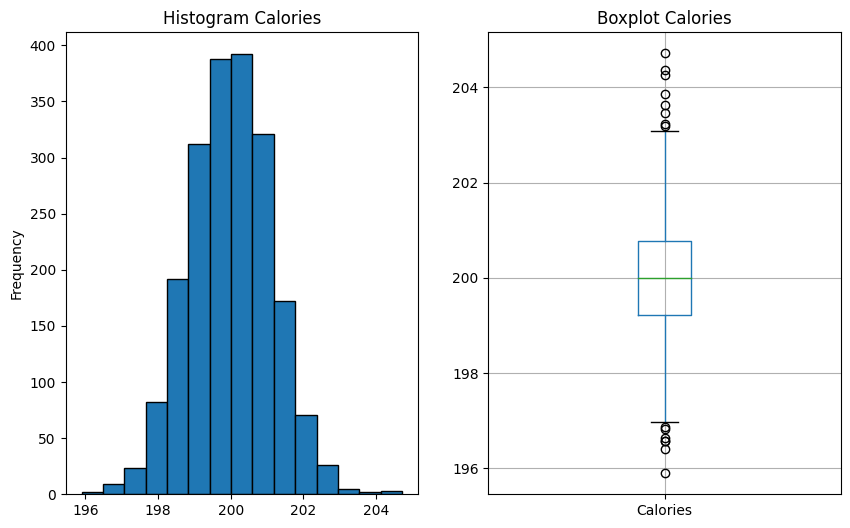

In [55]:
plot_attribute(data, 'Calories')

# Flavour

Dalam kolom Flavour, terdapat empat rasa unik: Chocolate, Vanilla, Strawberry, dan Undefined. Rasa Chocolate adalah yang paling umum, mewakili sekitar 33.9% dari data. Ini diikuti dekat oleh Vanilla dan Strawberry, masing-masing mewakili sekitar 33.2% dan 32.8% dari data.

Frekuensi masing-masing rasa Chocolate, Vanilla, dan Strawberry berkisar antara 600 hingga 700, menunjukkan distribusi yang hampir merata di antara ketiga rasa ini.

Namun, rasa Undefined sangat jarang muncul dalam data, dengan proporsi hanya sekitar 0.1%. Ini menunjukkan bahwa hampir semua entri dalam dataset memiliki rasa yang didefinisikan.

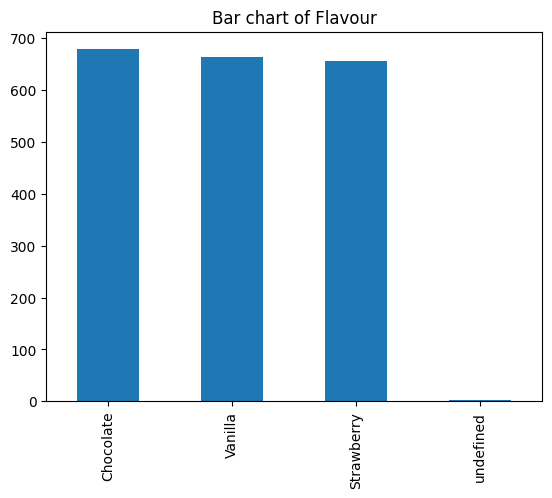

In [54]:
plot_categorical_attribute(data, 'Flavour')